In [1]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# 2016/08/22 13:00(JST) 04:00(UTC)
DROOT = '../data' 

In [57]:
!wgrib2 -version

v0.2.0.2 3/2015 Wesley Ebisuzaki, Reinoud Bokhorst, John Howard, Jaakko Hyvätti, Dusan Jovic, Kristian Nilssen, Karl Pfeiffer, Pablo Romero, Manfred Schwarb, Arlindo da Silva, Niklas Sondell, Sergey Varlamov


In [58]:
!wgrib2 $DROOT/RAW/Z__C_RJTD_20160822040000_SRF_GPV_Ggis1km_Prr60lv_ANAL_grib2.bin -netcdf $DROOT/NC/201608220400_wgrib2v202.nc

code_table_4.5a: product definition template #50008 not supported
code_table_4.5b: product definition template #50008 not supported
code_table_4.5a: product definition template #50008 not supported
code_table_4.5b: product definition template #50008 not supported
code_table_4.5a: product definition template #50008 not supported
code_table_4.5b: product definition template #50008 not supported
1:0:d=2016082204:var discipline=0 center=34 local_table=1 parmcat=1 parm=200:no_level::


In [55]:
!wgrib2 -version

v0.2.0.3 11/2015 Wesley Ebisuzaki, Reinoud Bokhorst, John Howard, Jaakko Hyvätti, Dusan Jovic, Kristian Nilssen, Karl Pfeiffer, Pablo Romero, Manfred Schwarb, Arlindo da Silva, Niklas Sondell, Sergey Varlamov


In [56]:
!wgrib2 $DROOT/RAW/Z__C_RJTD_20160822040000_SRF_GPV_Ggis1km_Prr60lv_ANAL_grib2.bin -netcdf $DROOT/NC/201608220400_wgrib2v203.nc

1:0:d=2016082204:var discipline=0 center=34 local_table=1 parmcat=1 parm=200:surface:-60-0 min acc fcst:


In [51]:
!wgrib2 -version

v0.2.0.4 2/2016 Wesley Ebisuzaki, Reinoud Bokhorst, John Howard, Jaakko Hyvätti, Dusan Jovic, Kristian Nilssen, Karl Pfeiffer, Pablo Romero, Manfred Schwarb, Arlindo da Silva, Niklas Sondell, Sergey Varlamov


In [52]:
!wgrib2 $DROOT/RAW/Z__C_RJTD_20160822040000_SRF_GPV_Ggis1km_Prr60lv_ANAL_grib2.bin -netcdf $DROOT/NC/201608220400_wgrib2v204.nc

1:0:d=2016082204:var discipline=0 center=34 local_table=1 parmcat=1 parm=200:surface:-60-0 min acc fcst:


In [60]:
!wgrib2 -version

v0.2.0.5 7/2016  Wesley Ebisuzaki, Reinoud Bokhorst, John Howard, Jaakko Hyvätti, Dusan Jovic, Daniel Lee, Kristian Nilssen, Karl Pfeiffer, Pablo Romero, Manfred Schwarb, Gregor Schee, Arlindo da Silva, Niklas Sondell, Sam Trahan, Sergey Varlamov


In [61]:
!wgrib2 $DROOT/RAW/Z__C_RJTD_20160822040000_SRF_GPV_Ggis1km_Prr60lv_ANAL_grib2.bin -netcdf $DROOT/NC/201608220400_wgrib2v205.nc

1:0:d=2016082204:var discipline=0 center=34 local_table=1 parmcat=1 parm=200:surface:-60-0 min acc fcst:


In [38]:
!wgrib2 -version

v0.2.0.8 2/2019  Wesley Ebisuzaki, Reinoud Bokhorst, John Howard, Jaakko Hyvätti, Dusan Jovic, Daniel Lee, Kristian Nilssen, Karl Pfeiffer, Pablo Romero, Manfred Schwarb, Gregor Schee, Arlindo da Silva, Niklas Sondell, Sam Trahan, Sergey Varlamov


In [39]:
!wgrib2 $DROOT/RAW/Z__C_RJTD_20160822040000_SRF_GPV_Ggis1km_Prr60lv_ANAL_grib2.bin -netcdf $DROOT/NC/201608220400_wgrib2v208.nc

1:0:d=2016082204:var discipline=0 center=34 local_table=1 parmcat=1 parm=200:surface:-1-0 hour acc fcst:


In [62]:
v204 = xr.open_dataset(f'{DROOT}/NC/201608220400_wgrib2v204.nc', engine='netcdf4')
v205 = xr.open_dataset(f'{DROOT}/NC/201608220400_wgrib2v205.nc', engine='netcdf4')
# v208 = xr.open_dataset(f'{DROOT}/NC/201608220400_wgrib2v208.nc', engine='netcdf4')

In [63]:
v204_tmp = v204['var0_1_200_surface'].isel(time=0).values
v205_tmp = v205['var0_1_200_surface'].isel(time=0).values

dif = v205_tmp - v204_tmp

llon, llat = np.meshgrid(v204.longitude, v204.latitude)

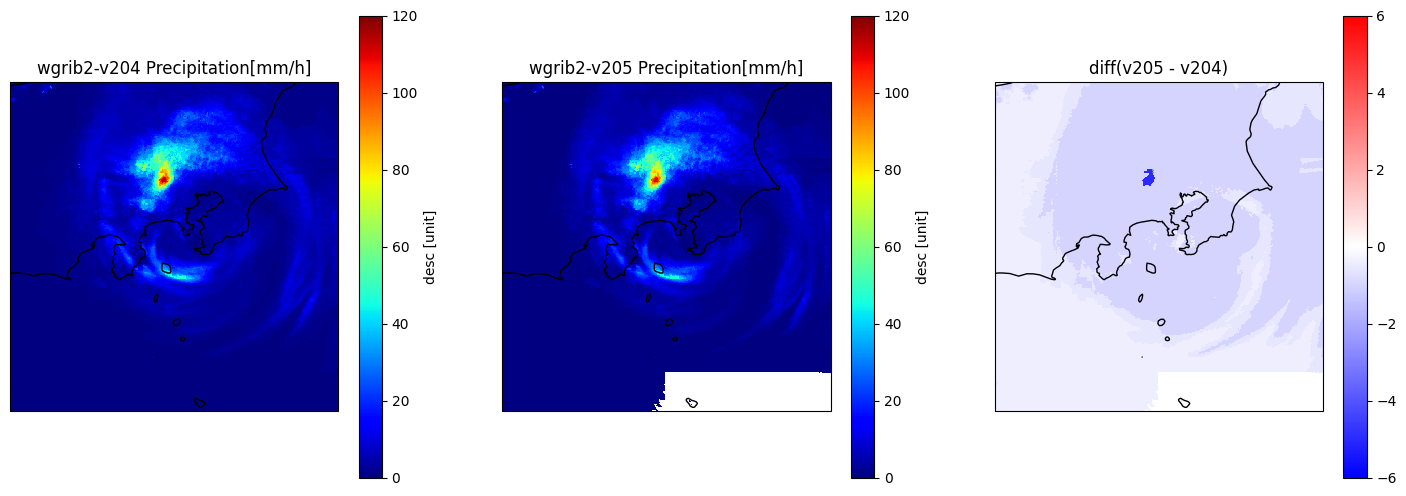

In [66]:
fig = plt.figure(figsize=(18, 6), facecolor='w')
ax = fig.add_subplot(131, projection=ccrs.PlateCarree())
ax.set_extent([137.5,141.5,33,37], ccrs.PlateCarree())
ax.coastlines(resolution='10m')
v204['var0_1_200_surface'].plot(vmin=0, vmax=120, cmap='jet')
ax.set_title('wgrib2-v204 Precipitation[mm/h]')

ax1 = fig.add_subplot(132, projection=ccrs.PlateCarree())
ax1.set_extent([137.5,141.5,33,37], ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
v205['var0_1_200_surface'].plot(vmin=0, vmax=120, cmap='jet')
ax1.set_title('wgrib2-v205 Precipitation[mm/h]')

ax2 = fig.add_subplot(133, projection=ccrs.PlateCarree())
ax2.set_extent([137.5,141.5,33,37], ccrs.PlateCarree())
ax2.coastlines(resolution='10m')
ax2.set_title('diff(v205 - v204)')
im = ax2.pcolormesh(llon, llat, dif, cmap='bwr', vmin=-6, vmax=6)
plt.colorbar(im)

In [47]:
np.nanmin(dif)

-5.0